In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

dog_dir = '/content/dog'
cat_dir = '/content/cat'
all_image_paths = []
all_labels = []

for filename in os.listdir(dog_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        all_image_paths.append(os.path.join(dog_dir, filename))
        all_labels.append(0)
for filename in os.listdir(cat_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        all_image_paths.append(os.path.join(cat_dir, filename))
        all_labels.append(1)

all_image_paths = np.array(all_image_paths)
all_labels = np.array(all_labels)

X_train, X_test, y_train, y_test = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

print(f"Total images collected: {len(all_image_paths)}")
print(f"Total labels collected: {len(all_labels)}")
print(f"Training images: {len(X_train)}")
print(f"Testing images: {len(X_test)}")
print(f"Training labels: {len(y_train)}")
print(f"Testing labels: {len(y_test)}")

Total images collected: 78
Total labels collected: 78
Training images: 62
Testing images: 16
Training labels: 62
Testing labels: 16


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_WIDTH = 150
IMG_HEIGHT = 150

def preprocess_image(image_path):
    """
    Loads an image from the given path, resizes it, converts it to a NumPy array,
    and normalizes its pixel values.
    """
    img = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

print("Preprocessing training images...")
X_train_processed = np.array([preprocess_image(path) for path in X_train])
print("Preprocessing testing images...")
X_test_processed = np.array([preprocess_image(path) for path in X_test])

print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Preprocessing training images...
Preprocessing testing images...
Shape of X_train_processed: (62, 150, 150, 3)
Shape of X_test_processed: (16, 150, 150, 3)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully with Adam optimizer, binary crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, binary crossentropy loss, and accuracy metric.


In [6]:
history = model.fit(
    X_train_processed,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

print("Model training complete.")

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.6093 - loss: 0.6670 - val_accuracy: 0.3077 - val_loss: 9.9083
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 0.4796 - loss: 5.6569 - val_accuracy: 0.6923 - val_loss: 2.7585
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.5548 - loss: 3.4540 - val_accuracy: 0.6923 - val_loss: 1.7983
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - accuracy: 0.5821 - loss: 1.6861 - val_accuracy: 0.3846 - val_loss: 0.7521
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - accuracy: 0.7815 - loss: 0.5017 - val_accuracy: 0.3077 - val_loss: 1.0382
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - accuracy: 0.5140 - loss: 0.5728 - val_accuracy: 0.4615 - val_loss: 0.7297
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step - accuracy: 0.9279 - loss: 0.4185 - val_accuracy: 0.6923 - val_loss: 0.6097
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 716ms/step - accuracy: 0.9728 - loss: 0.3328 - val_accuracy: 0.6923 - val_loss:

In [7]:
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5208
Test Accuracy: 0.8125


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Displaying 5 sample predictions...


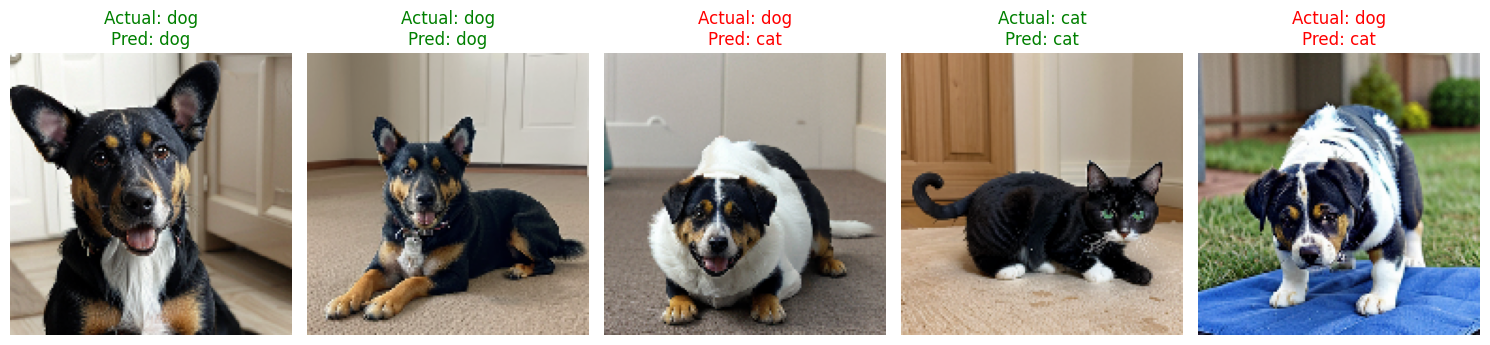

In [8]:
import matplotlib.pyplot as plt
import numpy as np
class_names = ['dog', 'cat']

num_samples = 5
sample_indices = np.random.choice(len(X_test_processed), num_samples, replace=False)

sample_images = X_test_processed[sample_indices]
sample_actual_labels = y_test[sample_indices]
sample_original_paths = X_test[sample_indices]

sample_predictions_prob = model.predict(sample_images)
sample_predictions = (sample_predictions_prob > 0.5).astype(int)

print(f"Displaying {num_samples} sample predictions...")
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])

    actual_label_name = class_names[sample_actual_labels[i]]
    predicted_label_name = class_names[sample_predictions[i][0]]

    color = "green" if predicted_label_name == actual_label_name else "red"

    plt.title(f"Actual: {actual_label_name}\nPred: {predicted_label_name}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
